In [1]:
#https://www.hackdeploy.com/assumptions-of-linear-regression-with-python/

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
#%matplotlib inline


"""
Real-world data of Boston housing prices
Additional Documentation: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

Attributes:
data: Features/predictors
label: Target/label/response variable
feature_names: Abbreviations of names of features
"""
boston = datasets.load_boston()


"""
Artificial linear data using the same number of features and observations as the
Boston housing prices dataset for assumption test comparison
"""
linear_X, linear_y = datasets.make_regression(n_samples=boston.data.shape[0],
                                              n_features=boston.data.shape[1],
                                              noise=75, random_state=46)

# Setting feature names to x1, x2, x3, etc. if they are not defined
linear_feature_names = ['X'+str(feature+1) for feature in range(linear_X.shape[1])]

In [3]:
data = pd.read_csv('data_omollo.csv')

In [4]:
# converting the dataframe from wide to long
import itertools as it

colNames = ['CN_ID', 'IND_ID', 'CHQ_ID', 'EM', 'RU','EI','ROA','ROE','FS','LV']

year_colunm = []
column_data = []

repeat_cols = colNames[0:3]

# make convert each column name into an empty list variable
for item in colNames:
    locals()[item]=[]


# grab data and append it to th

for name in colNames:
    
    if name in repeat_cols:
       # x = list(data[name])
        
        # grab the data corresponding to each item in repeat_col list
        df_subset = list(data[name])
        
        # replicate each column 5 times (length of 2017 - 2021) and rbind thim
        new_list = df_subset *5


      
        
        locals()[name] = new_list
    else:
        column_data = []
        df_subset = data.filter(regex=name, axis=1)
        #print(df_subset.columns)
        
        
        for colname in df_subset.columns:
            # create a list called year and yepeat each year length of the original dataframe times
            if colname[0:2] == 'EM':
                
                # grab each year as a list and repeat the list *n times (n is the lenth of the original data (89) rows)
                new_year=[colname[-4:]] * len(df_subset)
                
                #append the created list ti the bigger list containing other years
                year_colunm.append(new_year)
            
            # loop through each years column and get the correspondind data. Join the data into a single list
            
            col_data = df_subset.filter(regex = colname[-4:], axis =1)
            col_data = col_data[col_data.columns[0]]
            
                #flat_list = list(itertools.chain(*new_list))
            
            column_data.append(col_data)
            # flatten the list
        column_data = list(np.concatenate(column_data).flat)
        
        locals()[name] = column_data
        
# flatten the year list            
year_colunm = list(np.concatenate(year_colunm).flat)           
 
# combine all the created lists into a dataframe
long_data = pd.DataFrame({
    'CN_ID': CN_ID,
    'IND_ID': IND_ID,
    'CHQ_ID' : CHQ_ID,
    'Year' : year_colunm,
    'EM': EM,
    'RU' : RU,
    'EI': EI,
    'ROA':ROA,
    'ROE': ROE,
    'FS':FS,
    'LV': LV
    
})

long_data


,CN_ID,IND_ID,CHQ_ID,Year,EM,RU,EI,ROA,ROE,FS,LV
0,1,2,1,2021,59.415584,57.692308,0.0,0.062133,0.141931,22.714080,0.376769
1,2,2,1,2021,36.440678,35.964912,50.0,0.047013,0.107257,22.494671,0.224894
2,3,2,1,2021,69.285714,44.029851,50.0,0.026121,0.221638,22.112328,0.558066
3,4,1,2,2021,76.530612,92.910448,0.0,0.060561,0.283454,22.272495,0.195132
4,5,3,2,2021,0.000000,0.000000,0.0,-0.015718,-0.026849,21.291634,0.276344
...,...,...,...,...,...,...,...,...,...,...,...
440,87,2,25,2017,27.000000,20.652174,0.0,-0.000308,-0.001107,21.802944,0.243981
441,89,2,25,2017,59.859155,65.942029,0.0,0.059889,0.113228,22.942328,0.241784
442,65,3,25,2017,7.746479,0.000000,0.0,0.008526,0.014053,22.357870,0.193548
443,84,3,25,2017,47.183099,13.043478,0.0,0.034198,0.113703,21.534907,0.366983


In [75]:
def test_linear_regression_assumptions(data, predictor, response, control):
    

    plt.style.use('dark_background')
    import statsmodels.formula.api as smf
    import statsmodels.api as sm
    from statsmodels.compat import lzip
    import statsmodels.stats.api as sms
    from statsmodels.stats.diagnostic import het_white


    from patsy import dmatrices

    #import statsmodels.api as sm

    #%matplotlib inline


    #long_data_as_npArray = long_data.to_numpy()

    #response_var_list = ['ROA', 'ROE']
    #predictor_var_list = ['EM', 'RU', 'EI']

    #control = 'FS'


    #fig, scatter = plt.subplots(figsize=(11.85,5.5))
    #fig, residual_independece = plt.subplots(figsize=(11.85,5.5))
    #fig, residual_normality = plt.subplots(figsize=(11.85,5.5))



    ##############################
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """





    #############################
    for response_var in response:
        print (f'----------------------------------TESTING FOR ASSUMPTIONS FOR {response_var}-----------------------------------')

        print('\n============================================================================================')

        print('Assumption 1: Linear Relationship between the PREDICTOR and the RESPONSE variables')
        print('\nAssumption 2: RESIDUAL ERRORS are: random,independent')

        print('\nAssumption 3: Residual  errors are normally distributed')

        print('\nAssumption 4: Residual errors are homoscedastics')

        print('===============================================================================================')


        for predictor_var in predictor:
            plt.figure(figsize=(15, 10),dpi = 100)


            sns.lmplot(x=predictor_var, y=response_var,data = data, fit_reg=True, palette='viridis', height=5, aspect=2)
            plt.ylabel(f'{response_var}',fontsize=15)
            plt.xlabel(f'{predictor_var}',fontsize=15)
            plt.tick_params(axis='x', labelsize=15)
            plt.tick_params(axis='y', labelsize=15)
            plt.title(f'Assumption 1: Linearity \n{response_var} vs {predictor_var}', fontsize=15)
            #plt.show()


            '''
            Residual Error: Assumes that residual errors left over 
                            from fitting the model to the data are independent, 
                            identically distributed random variables

            '''

            model_expr = f'{response_var} ~ {predictor_var} + {control}'
            y, X = dmatrices(model_expr, data, return_type='dataframe')
            mask = np.random.rand(len(X)) < 0.8
            X_train = X[mask]
            y_train = y[mask]
            X_test = X[~mask]
            y_test = y[~mask]

            olsr_results = sm.OLS(y_train, X_train).fit()
            olsr_predictions = olsr_results.get_prediction(X_test)
            prediction_summary_frame = olsr_predictions.summary_frame()

            #print('Training completed')

            #print(olsr_results.summary())
            print('Training completed')

            resid = y_test[response_var] - prediction_summary_frame['mean']

            fig, ax = plt.subplots(figsize=(11.85,5.5))
            ax.scatter(y_test[response_var], resid, s=10, c='lime', alpha = 0.7, marker ='o')

            ax.set_xlabel(f'Predicted {response_var}', fontsize=18)
            ax.set_ylabel('Residual Error of Regression', fontsize=18)
            ax.set_title(f'Assumprion 2 :Residual  errors are independent and normal \n Model: {model_expr}', fontsize=18)

            #plt.show()



            '''
            Assumpption 3: The residual errors should all have a normal distribution with a mean of zero. 
                           In statistical language:
            '''


            fig, ay = plt.subplots(figsize=(11.85,5.5))

            ay.hist(resid)
            #sns.distplot(resid)

            ay.set_xlabel(f'Predicted {response_var}', fontsize=18)
            ay.set_ylabel('Residual Error of Regression', fontsize=18)
            ay.set_title(f'Assumprion 3 :Residual  errors are normally distributed\n Model: {model_expr}', fontsize=18)

            #resid.hist(bins=50)
            plt.show()
            

            name = ['Jarque-Bera test', 'Chi-squared(2) p-value', 'Skewness', 'Kurtosis']

            #run the Jarque-Bera test for Normality on the residuals vector
            test = sms.jarque_bera(resid)
            
            print('\nPerfoming the  Jarque Bera Test for residual ...')
            
            print('\n==================================================================================================================\n')
            
            print(f'RESIDUAL NORMALITY TEST RESULTS FOR ({model_expr}) MODEL')
            
            print('\n==================================================================================================================')
            
            print(pd.DataFrame({
                'stat':name,
                'value':test
            }))

            
            if test[1] < 0.01:
                print(' **** Residuals of the linear regression model are for all practical purposes not normally distributed ****')
            else:
                print('**** Residuals of the linear regression model are normally distributed ****')

            print('\n==================================================================================================================\n')
            # Assumption 4:
            '''
            Assumpption 4: Residual error homoscedasity:
            '''

            keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:', 'F-statistic:', 'F-test\'s p-value:']
            #run the White test
            results = het_white(resid, X_test)

            #print the results. We will get to see the values of two test-statistics and the corresponding p-values
            lzip(keys, results)
            
            print('Perfoming the  White test for heteroscedasticity ...')
            
            print('\n==================================================================================================================\n')
            
            print(f'RESIDUAL HOMOCEDACITY TEST RESULTS FOR ({model_expr}) MODEL')
            
            print('\n==================================================================================================================')
            
            print(pd.DataFrame({
                'stat':keys,
                'value':results
            }))

            
            if results[3] < 0.01:
                print(' **** Residuals of the linear regression model are for all practical purposes not homocedastic ****')
            else:
                print('**** Residuals of the linear regression model are homocedastic ****')

            print('\n==================================================================================================================\n')
        

    



----------------------------------TESTING FOR ASSUMPTIONS FOR ROA-----------------------------------

Assumption 1: Linear Relationship between the PREDICTOR and the RESPONSE variables

Assumption 2: RESIDUAL ERRORS are: random,independent

Assumption 3: Residual  errors are normally distributed

Assumption 4: Residual errors are homoscedastics
Training completed


<Figure size 1500x1000 with 0 Axes>

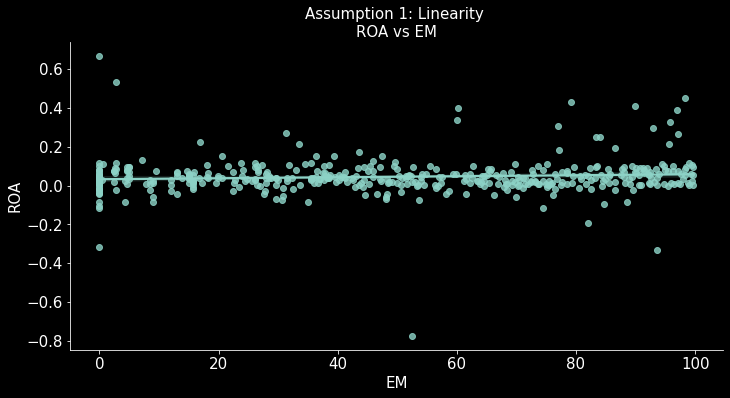

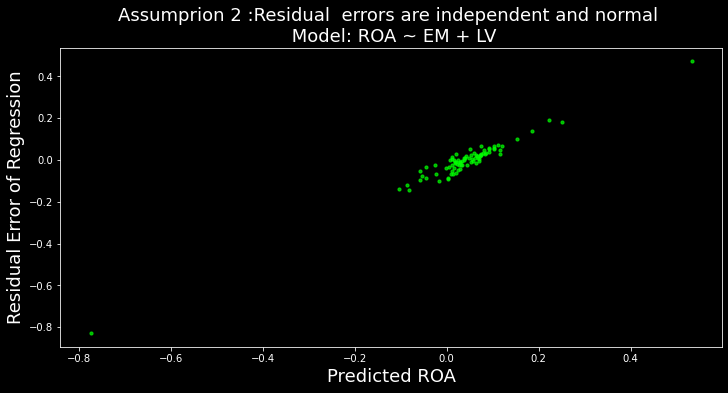

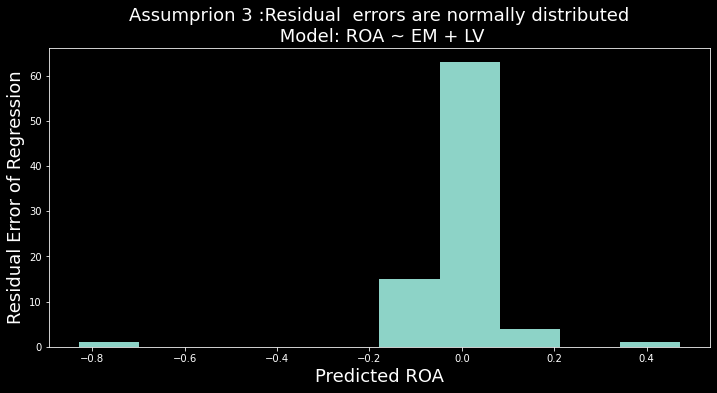


Perfoming the  Jarque Bera Test for residual ...


RESIDUAL NORMALITY TEST RESULTS FOR (ROA ~ EM + LV) MODEL

                     stat        value
0        Jarque-Bera test  2772.713795
1  Chi-squared(2) p-value     0.000000
2                Skewness    -3.097705
3                Kurtosis    30.455798
 **** Residuals of the linear regression model are for all practical purposes not normally distributed ****


Perfoming the  White test for heteroscedasticity ...


RESIDUAL HOMOCEDACITY TEST RESULTS FOR (ROA ~ EM + LV) MODEL

                             stat     value
0  Lagrange Multiplier statistic:  1.595393
1              LM test's p-value:  0.901806
2                    F-statistic:  0.302023
3               F-test's p-value:  0.910261
**** Residuals of the linear regression model are homocedastic ****


Training completed


<Figure size 1500x1000 with 0 Axes>

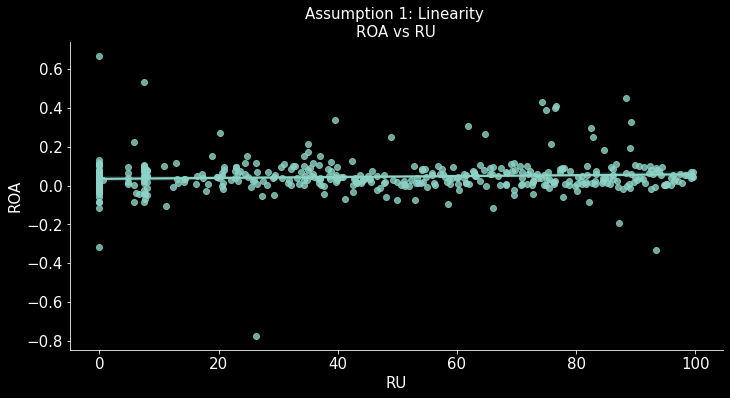

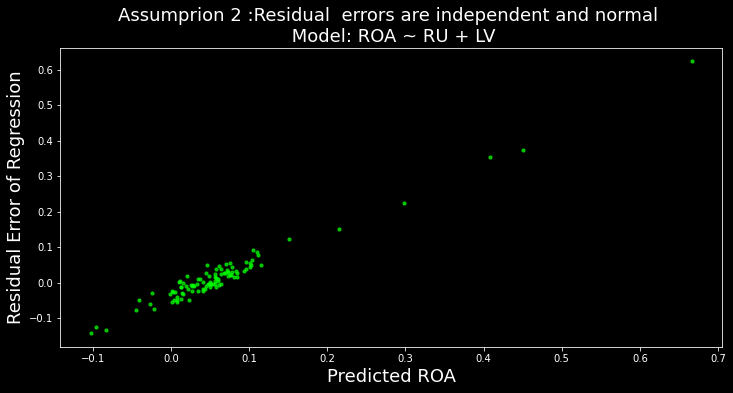

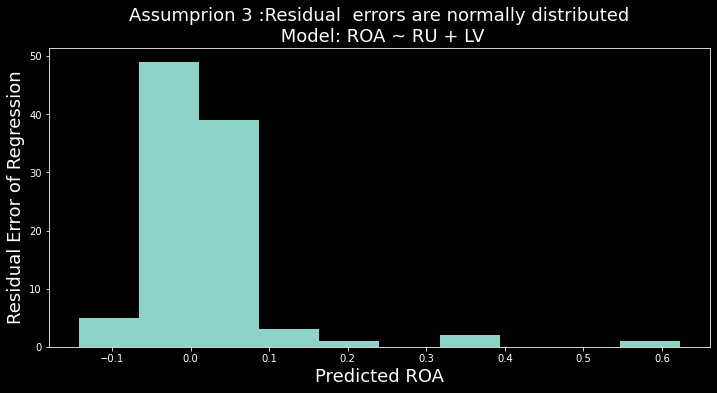


Perfoming the  Jarque Bera Test for residual ...


RESIDUAL NORMALITY TEST RESULTS FOR (ROA ~ RU + LV) MODEL

                     stat        value
0        Jarque-Bera test  1697.029379
1  Chi-squared(2) p-value     0.000000
2                Skewness     3.672805
3                Kurtosis    21.797049
 **** Residuals of the linear regression model are for all practical purposes not normally distributed ****


Perfoming the  White test for heteroscedasticity ...


RESIDUAL HOMOCEDACITY TEST RESULTS FOR (ROA ~ RU + LV) MODEL

                             stat     value
0  Lagrange Multiplier statistic:  2.845826
1              LM test's p-value:  0.723740
2                    F-statistic:  0.550687
3               F-test's p-value:  0.737416
**** Residuals of the linear regression model are homocedastic ****


Training completed


<Figure size 1500x1000 with 0 Axes>

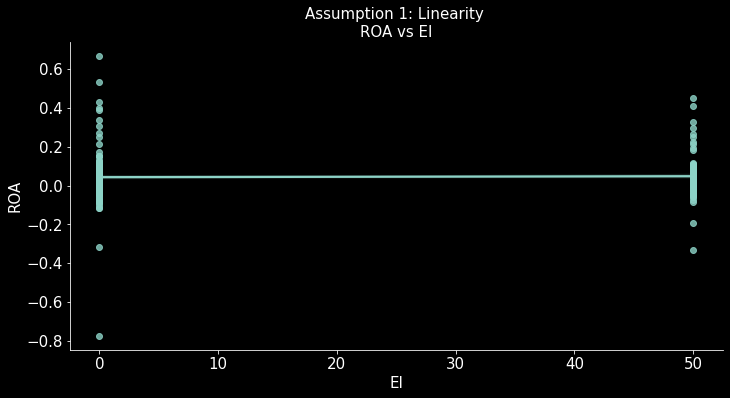

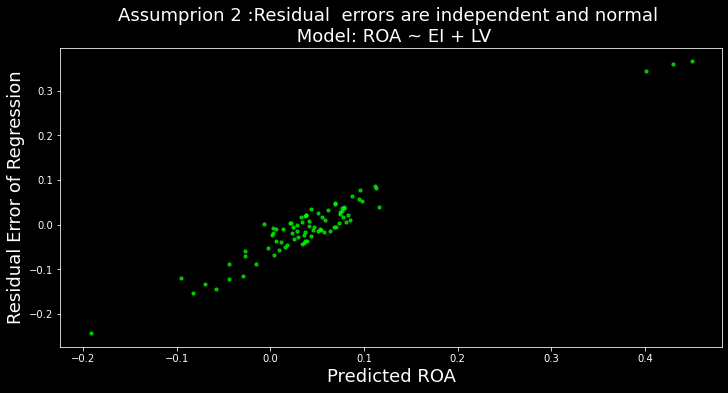

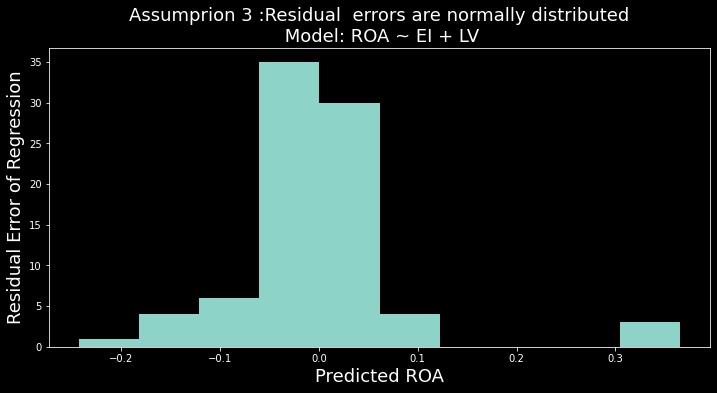


Perfoming the  Jarque Bera Test for residual ...


RESIDUAL NORMALITY TEST RESULTS FOR (ROA ~ EI + LV) MODEL

                     stat         value
0        Jarque-Bera test  2.620485e+02
1  Chi-squared(2) p-value  1.249923e-57
2                Skewness  1.905373e+00
3                Kurtosis  1.082632e+01
 **** Residuals of the linear regression model are for all practical purposes not normally distributed ****


Perfoming the  White test for heteroscedasticity ...


RESIDUAL HOMOCEDACITY TEST RESULTS FOR (ROA ~ EI + LV) MODEL

                             stat     value
0  Lagrange Multiplier statistic:  6.178847
1              LM test's p-value:  0.186184
2                    F-statistic:  1.568416
3               F-test's p-value:  0.191047
**** Residuals of the linear regression model are homocedastic ****


----------------------------------TESTING FOR ASSUMPTIONS FOR ROE-----------------------------------

Assumption 1: Linear Relationship between the PREDICTOR and the RESPON

<Figure size 1500x1000 with 0 Axes>

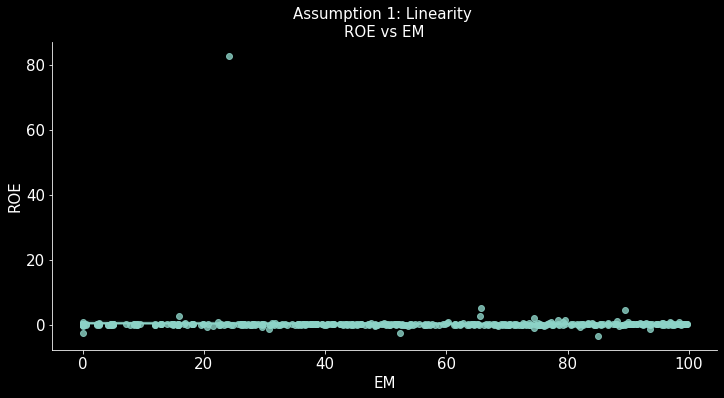

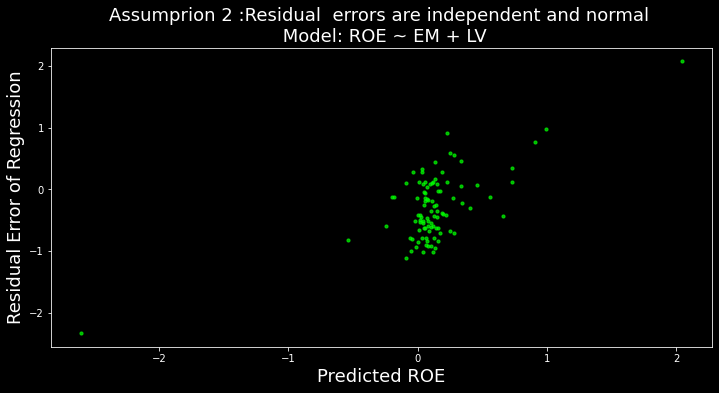

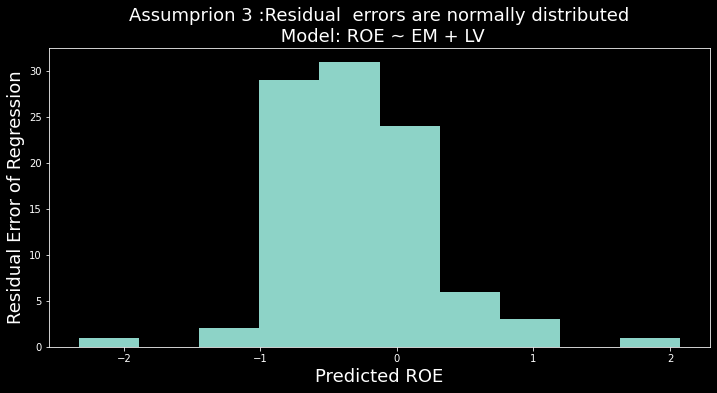


Perfoming the  Jarque Bera Test for residual ...


RESIDUAL NORMALITY TEST RESULTS FOR (ROE ~ EM + LV) MODEL

                     stat         value
0        Jarque-Bera test  5.773564e+01
1  Chi-squared(2) p-value  2.903117e-13
2                Skewness  5.606610e-01
3                Kurtosis  6.609397e+00
 **** Residuals of the linear regression model are for all practical purposes not normally distributed ****


Perfoming the  White test for heteroscedasticity ...


RESIDUAL HOMOCEDACITY TEST RESULTS FOR (ROE ~ EM + LV) MODEL

                             stat      value
0  Lagrange Multiplier statistic:  14.023044
1              LM test's p-value:   0.015464
2                    F-statistic:   3.075786
3               F-test's p-value:   0.013048
**** Residuals of the linear regression model are homocedastic ****


Training completed


<Figure size 1500x1000 with 0 Axes>

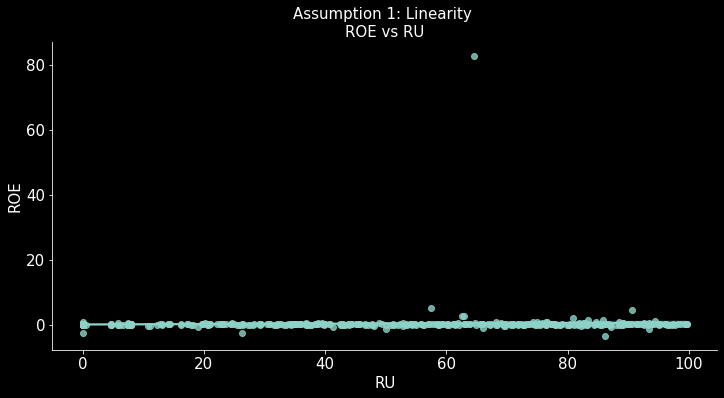

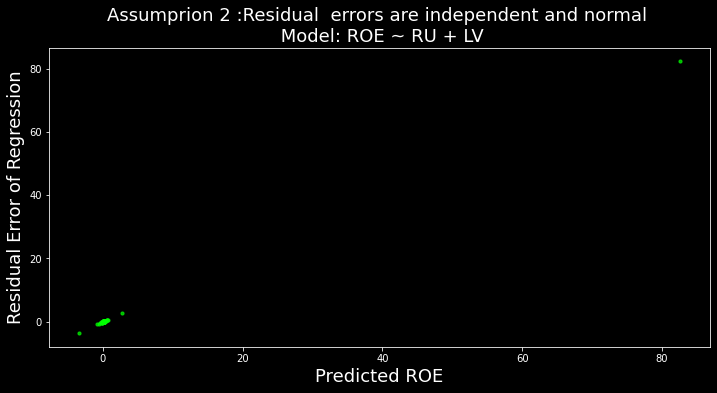

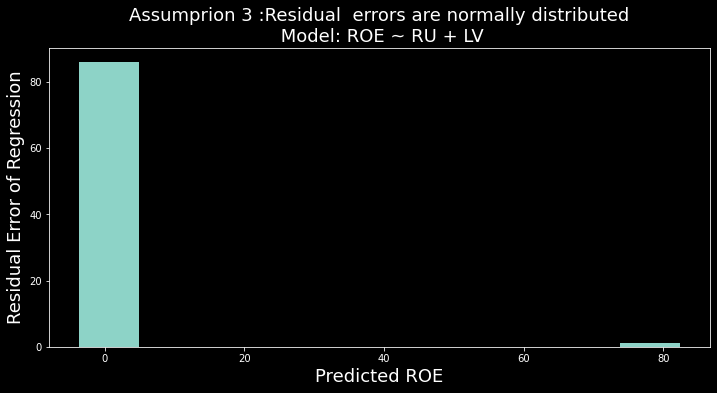


Perfoming the  Jarque Bera Test for residual ...


RESIDUAL NORMALITY TEST RESULTS FOR (ROE ~ RU + LV) MODEL

                     stat         value
0        Jarque-Bera test  25221.916900
1  Chi-squared(2) p-value      0.000000
2                Skewness      9.114304
3                Kurtosis     84.397101
 **** Residuals of the linear regression model are for all practical purposes not normally distributed ****


Perfoming the  White test for heteroscedasticity ...


RESIDUAL HOMOCEDACITY TEST RESULTS FOR (ROE ~ RU + LV) MODEL

                             stat     value
0  Lagrange Multiplier statistic:  5.322104
1              LM test's p-value:  0.377847
2                    F-statistic:  1.055586
3               F-test's p-value:  0.391188
**** Residuals of the linear regression model are homocedastic ****


Training completed


<Figure size 1500x1000 with 0 Axes>

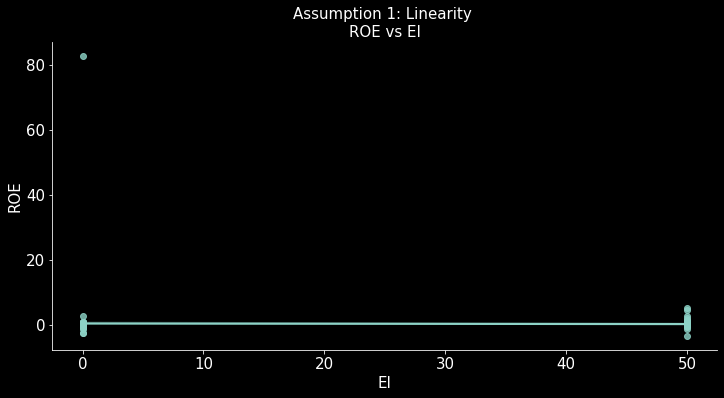

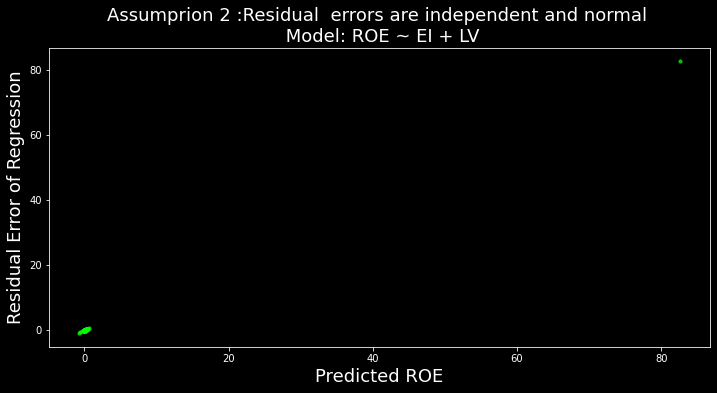

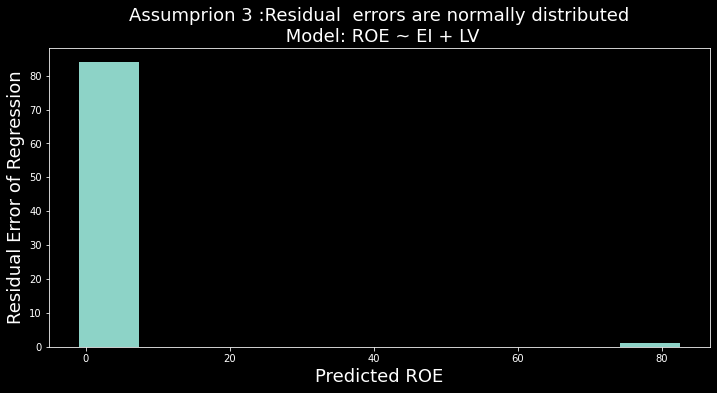


Perfoming the  Jarque Bera Test for residual ...


RESIDUAL NORMALITY TEST RESULTS FOR (ROE ~ EI + LV) MODEL

                     stat         value
0        Jarque-Bera test  23780.390512
1  Chi-squared(2) p-value      0.000000
2                Skewness      9.048205
3                Kurtosis     82.918603
 **** Residuals of the linear regression model are for all practical purposes not normally distributed ****


Perfoming the  White test for heteroscedasticity ...


RESIDUAL HOMOCEDACITY TEST RESULTS FOR (ROE ~ EI + LV) MODEL

                             stat     value
0  Lagrange Multiplier statistic:  6.210197
1              LM test's p-value:  0.183991
2                    F-statistic:  1.576396
3               F-test's p-value:  0.188626
**** Residuals of the linear regression model are homocedastic ****




In [76]:
test_linear_regression_assumptions(long_data,['EM', 'RU', 'EI'],['ROA', 'ROE'], 'LV')

In [78]:
prediction_summary_frame['mean']
len(y_test[response_var])
model_expr

'ROE ~ EI + FS'

In [15]:
"""
Real-world data of Boston housing prices
Additional Documentation: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

Attributes:
data: Features/predictors
label: Target/label/response variable
feature_names: Abbreviations of names of features
"""
boston = datasets.load_boston()


"""
Artificial linear data using the same number of features and observations as the
Boston housing prices dataset for assumption test comparison
"""
linear_X, linear_y = datasets.make_regression(n_samples=long_data_as_npArray.shape[0],
                                              n_features=1, random_state=46)

# Setting feature names to x1, x2, x3, etc. if they are not defined
linear_feature_names = ['X'+str(feature+1) for feature in range(linear_X.shape[1])]

In [16]:
linear_feature_names

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']

In [23]:
from sklearn.linear_model import LinearRegression

# Fitting the model
boston_model = LinearRegression()
boston_model.fit(long_data.ROA, long_data.EM)

# Returning the R^2 for the model
#boston_r2 = boston_model.score(long_data.ROA, long_data.EM)
print('R^2: {0}'.format(boston_r2))


ValueError: Expected 2D array, got 1D array instead:
array=[ 6.21330e-02  4.70130e-02  2.61210e-02  6.05610e-02 -1.57180e-02
 -8.53080e-02  3.12500e-03  1.00787e-01  3.76880e-02  4.18320e-02
  1.15478e-01  5.32773e-01  4.99770e-02  6.13520e-02  2.15864e-01
  6.94260e-02  2.48260e-01  8.33500e-02  7.94600e-02  3.39688e-01
  1.17480e-02  9.35700e-03  4.49810e-01  3.07715e-01  8.11540e-02
  5.54200e-03  2.51810e-02  1.15790e-01  2.63825e-01  3.27629e-01
  4.07899e-01  6.43250e-02  6.08700e-03  2.98558e-01  8.46550e-02
 -2.52910e-02  8.34200e-03  9.87330e-02  2.50560e-02  9.13850e-02
 -1.32390e-02  4.75930e-02  1.17372e-01  1.35300e-02  3.10190e-02
  3.98070e-02 -3.16800e-02  8.80100e-03  1.76070e-02  3.91170e-01
  7.85590e-02  2.54640e-02  4.29921e-01  4.01050e-01  7.03070e-02
  5.73090e-02  5.49810e-02  1.69980e-02 -4.44870e-02  7.00820e-02
  7.65630e-02  1.03855e-01  4.44910e-02  1.85721e-01 -1.02617e-01
  3.70970e-02  3.77030e-02  9.32870e-02  7.80660e-02  1.02684e-01
  6.49310e-02  1.01067e-01  1.20124e-01  8.92960e-02  7.03540e-02
  1.11976e-01  2.14532e-01  1.30266e-01  6.80370e-02  9.94930e-02
 -4.49790e-02  6.48210e-02  6.97660e-02  5.14990e-02  4.10840e-02
  5.05370e-02 -4.57400e-02  2.51117e-01  6.74300e-03  6.19220e-02
  1.53480e-02  4.58040e-02 -4.98100e-03  2.62260e-02 -8.49150e-02
  6.47300e-03  7.63550e-02  3.72420e-02  1.03384e-01  7.28120e-02
  7.33740e-02  4.18490e-02  5.63260e-02  3.65070e-02  4.41560e-02
  5.07870e-02  4.71280e-02  5.38630e-02  6.10430e-02 -7.67500e-03
  2.93500e-02  8.48060e-02 -9.51020e-02  4.07040e-02  4.43200e-03
  2.47860e-02  9.40740e-02  4.29730e-02  6.55050e-02  1.11528e-01
  5.56210e-02  1.27580e-02  1.32170e-02  1.98590e-02 -7.00540e-02
  1.29120e-02  2.94900e-03 -7.74000e-01  9.49570e-02 -4.44240e-02
  4.50600e-02  7.56400e-02  1.01100e-03  1.74960e-02  3.56510e-02
 -4.08550e-02 -1.54200e-02  2.77500e-03  7.29010e-02  1.44850e-02
  1.94520e-02  6.14280e-02  1.04210e-01  8.06960e-02  6.20930e-02
  3.82270e-02  8.59300e-03 -8.29370e-02  8.35500e-03  5.97570e-02
  5.03790e-02  5.98230e-02  2.15200e-02 -3.75270e-02 -8.65000e-04
 -6.95400e-03  6.94850e-02  5.30270e-02  8.57240e-02  4.16920e-02
  3.99660e-02  9.84440e-02 -2.08650e-02  3.49380e-02  8.53590e-02
  1.53953e-01  3.08110e-02  1.35510e-02  7.83970e-02 -2.44760e-02
  4.52770e-02  4.84180e-02  3.63800e-03  3.02300e-02  6.21340e-02
 -4.60060e-02  6.65720e-02  2.24840e-02  4.87880e-02  1.17370e-02
  4.66180e-02  4.08250e-02  5.73070e-02 -1.15252e-01  2.37030e-02
  9.62910e-02  4.12970e-02  1.09089e-01  6.96030e-02  5.17600e-02
  4.52970e-02  9.23330e-02  2.57950e-02  3.79270e-02  8.46600e-03
  1.10190e-02  5.02790e-02  2.23450e-02 -1.92720e-02  3.58450e-02
  1.37470e-02  1.04940e-02  3.43080e-02  5.66000e-03  3.94910e-02
  6.12010e-02  1.55450e-02  1.61030e-02  5.88100e-03  4.95890e-02
  4.36100e-03 -8.23900e-02  3.40980e-02 -7.56800e-02  4.16680e-02
  3.28690e-02  2.68100e-02  3.36760e-02 -2.87670e-02  1.08385e-01
  6.42090e-02 -9.24900e-03  3.74580e-02  2.96730e-02 -7.90900e-03
 -1.98240e-02 -2.85600e-03  3.67000e-04  2.60480e-02  2.39400e-02
 -2.25650e-02  4.07940e-02  7.20430e-02  1.46140e-02  4.28300e-03
  6.16400e-03  4.91040e-02  2.12690e-02 -5.44250e-02  8.30800e-02
  1.74880e-02  7.67410e-02 -4.53410e-02  1.70580e-02 -2.65100e-03
  8.70690e-02  7.17770e-02  9.59740e-02  3.28950e-02  2.42160e-02
  1.24318e-01  5.92000e-03  5.38120e-02  9.43760e-02  1.54050e-01
  1.58630e-02 -1.33960e-02  7.78710e-02 -5.67810e-02  3.77580e-02
  3.73360e-02 -3.16675e-01  3.31640e-02  5.52580e-02  2.34160e-02
  2.80450e-02  5.65610e-02  5.72590e-02  5.03890e-02  1.05366e-01
  7.91610e-02  6.19430e-02 -2.13700e-02  9.74300e-03  1.05013e-01
 -2.66040e-02  9.17940e-02  7.58630e-02  8.28300e-03  4.39730e-02
  9.96520e-02  5.39100e-03  1.03061e-01 -1.11260e-02  1.96420e-02
  4.11140e-02  2.40500e-03  9.21400e-03  2.53250e-02  7.50400e-03
  3.05480e-02  9.62180e-02  6.69800e-03  3.22460e-02  5.69820e-02
  1.25910e-02 -2.22310e-02 -1.16883e-01  5.03430e-02  6.69300e-03
 -1.91860e-01  3.69970e-02 -5.73590e-02  4.40060e-02  2.20400e-02
 -7.45300e-03  7.47940e-02  3.80600e-03  1.10866e-01  9.38750e-02
  2.70384e-01  6.34650e-02  3.74030e-02 -4.94810e-02  1.64700e-03
  1.55450e-02  1.28300e-03  2.64020e-02  2.60040e-02 -4.70870e-02
  1.45110e-02  1.53185e-01  2.36450e-02  4.55680e-02  1.23030e-02
  7.41050e-02  2.74760e-02  4.88990e-02  1.16497e-01  8.54700e-03
  9.57890e-02  3.50220e-02  3.43930e-02  2.22480e-02  9.00920e-02
  7.35670e-02  1.00867e-01  3.11860e-02  4.12140e-02  1.50857e-01
  5.28230e-02  4.55410e-02  9.67870e-02  1.70838e-01  5.14820e-02
  3.76640e-02  8.07040e-02  1.24910e-02  6.18850e-02  5.29920e-02
  4.37140e-02  2.85300e-02  6.42570e-02  1.33610e-02  4.60420e-02
  2.38300e-02 -3.77800e-03  4.99620e-02  2.73440e-02  1.00247e-01
  7.15940e-02  6.66030e-01 -9.94300e-03  1.92617e-01  3.74200e-02
  9.25750e-02  2.12840e-02 -8.24510e-02  3.69700e-02  9.61790e-02
  1.99860e-02  7.76540e-02 -3.71700e-03  1.85180e-02  7.01540e-02
  1.88200e-03  3.34500e-03  5.65840e-02  1.46420e-02  1.61800e-03
  9.78920e-02  3.40000e-03  3.18850e-02  5.06920e-02 -2.12930e-02
  9.73500e-03  1.00160e-02  8.31330e-02  7.44100e-03 -3.30612e-01
  3.67340e-02 -7.32620e-02  3.96250e-02  2.92640e-02 -3.63430e-02
  8.60580e-02 -5.78600e-02  1.12719e-01  8.13570e-02 -4.39160e-02
  5.04810e-02  6.82670e-02 -6.81070e-02  2.04270e-02  3.32010e-02
  3.50120e-02  1.85450e-02  2.66860e-02  2.41500e-03  3.32210e-02
  1.02362e-01  3.56900e-02  3.86370e-02  1.09020e-02  6.35410e-02
 -2.46660e-02  1.90370e-02  1.03020e-01  5.64300e-02  1.01966e-01
  3.53210e-02  1.32520e-02  1.81320e-02  5.49820e-02  5.80490e-02
  8.39010e-02  4.00820e-02  2.48210e-02  1.16339e-01  2.35750e-02
  2.68200e-02  2.22931e-01  1.16957e-01  2.45900e-02 -1.77380e-02
  5.11000e-02 -6.81200e-03  1.63010e-02  1.56300e-02 -1.68820e-02
 -3.08000e-04  5.98890e-02  8.52600e-03  3.41980e-02 -2.67440e-02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [20]:
long_data_as_npArray


array([[1, 2, 1, ..., 0.141931, 22.71408, 0.376769],
       [2, 2, 1, ..., 0.107257, 22.494671, 0.224894],
       [3, 2, 1, ..., 0.221638, 22.112328, 0.558066],
       ...,
       [65, 3, 25, ..., 0.014053, 22.35787, 0.193548],
       [84, 3, 25, ..., 0.113703, 21.534907, 0.366983],
       [88, 3, 25, ..., -0.063992, 21.774899, 0.22727]], dtype=object)